In [1]:
from keras.layers import Input, Flatten, Reshape, RepeatVector, Lambda, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import LSTM
from keras.models import Model
from keras import regularizers
from keras import backend as K
from keras import losses

from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.layers.merge import concatenate

Using TensorFlow backend.


In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
import numpy as np
import scipy.stats

In [4]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

## Naive autoencoder

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
encoding_dim = 100

In [7]:
input = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input, decoded)

In [8]:
encoder = Model(input, encoded)

In [9]:
decoder_input = Input(shape=(encoding_dim,))
decoder = Model(decoder_input, autoencoder.layers[-1](decoder_input))

In [10]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

In [11]:
history = autoencoder.fit(mnist.train.images, mnist.train.images, batch_size=128, nb_epoch=10,
                          validation_data=[mnist.test.images, mnist.test.images],
                          callbacks=[TensorBoard(log_dir='save/autoencoder_keras/tensorboard/'),
                                     ModelCheckpoint('save/autoencoder_keras/autoencoder_keras_{epoch:02d}.hdf5', period=2)])

/Users/zzeng/Documents/Python/env/ml_env/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 3s - loss: 0.3053 - val_loss: 0.2400
Epoch 2/10
55000/55000 [==============================] - 3s - loss: 0.2196 - val_loss: 0.1997
Epoch 3/10
55000/55000 [==============================] - 3s - loss: 0.1893 - val_loss: 0.1774
Epoch 4/10
55000/55000 [==============================] - 3s - loss: 0.1715 - val_loss: 0.1634
Epoch 5/10
55000/55000 [==============================] - 3s - loss: 0.1594 - val_loss: 0.1528
Epoch 6/10
55000/55000 [==============================] - 3s - loss: 0.1500 - val_loss: 0.1441
Epoch 7/10
55000/55000 [==============================] - 3s - loss: 0.1421 - val_loss: 0.1370
Epoch 8/10
55000/55000 [==============================] - 3s - loss: 0.1355 - val_loss: 0.1309
Epoch 9/10
55000/55000 [==============================] - 3s - loss: 0.1297 - val_loss: 0.1255
Epoch 10/10
55000/55000 [==============================] - 3s - loss: 0.1246 - val_loss: 0.1207

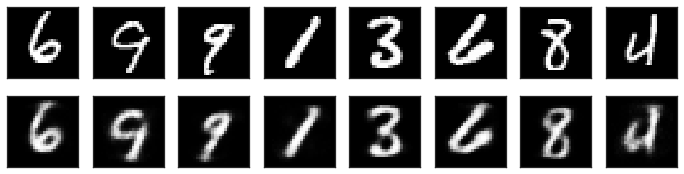

In [13]:
fig, fig_ax = plt.subplots(nrows=2, ncols=8, figsize=(12,3))
for i in range(8):
    random_image = mnist.test.images[np.random.randint(0, 10000, 1), :]
    plt.subplot(2,8,i+1)
    plt.imshow(random_image.reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    
    plt.subplot(2,8,i+9)
    plt.imshow(autoencoder.predict(random_image).reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

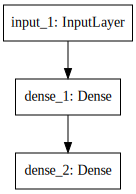

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

### denoising

In [11]:
noise_factor = 0.5

x_train = mnist.train.images
x_train_noised = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_train_noised = np.clip(x_train_noised, 0, 1)


x_test = mnist.test.images
x_test_noised = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_test_noised = np.clip(x_test_noised, 0, 1)

In [12]:
history = autoencoder.fit(x_train_noised, x_train, batch_size=128, nb_epoch=10,
                          validation_data=[x_test_noised, x_test])

/Users/zzeng/Documents/Python/env/ml_env/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 3s - loss: 0.2979 - val_loss: 0.2607
Epoch 2/10
55000/55000 [==============================] - 3s - loss: 0.2501 - val_loss: 0.2353
Epoch 3/10
55000/55000 [==============================] - 3s - loss: 0.2229 - val_loss: 0.2096
Epoch 4/10
55000/55000 [==============================] - 3s - loss: 0.2021 - val_loss: 0.1930
Epoch 5/10
55000/55000 [==============================] - 3s - loss: 0.1888 - val_loss: 0.1822
Epoch 6/10
55000/55000 [==============================] - 3s - loss: 0.1793 - val_loss: 0.1738
Epoch 7/10
55000/55000 [==============================] - 3s - loss: 0.1718 - val_loss: 0.1670
Epoch 8/10
55000/55000 [==============================] - 3s - loss: 0.1655 - val_loss: 0.1613
Epoch 9/10
55000/55000 [==============================] - 3s - loss: 0.1603 - val_loss: 0.1566
Epoch 10/10
55000/55000 [==============================] - 3s - loss: 0.1559 - val_loss: 0.1525

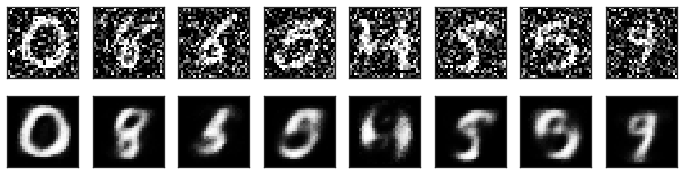

In [13]:
fig, fig_ax = plt.subplots(nrows=2, ncols=8, figsize=(12,3))
for i in range(8):
    random_image = x_test_noised[np.random.randint(0, 10000, 1), :]
    plt.subplot(2,8,i+1)
    plt.imshow(random_image.reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    
    plt.subplot(2,8,i+9)
    plt.imshow(autoencoder.predict(random_image).reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

## Adding a sparsity constraint on the encoded representations

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
encoding_dim = 100

In [31]:
input = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-5))(input)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input, decoded)

In [32]:
encoder = Model(input, encoded)

In [33]:
decoder_input = Input(shape=(encoding_dim,))
decoder = Model(decoder_input, autoencoder.layers[-1](decoder_input))

In [34]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [35]:
history = autoencoder.fit(mnist.train.images, mnist.train.images, batch_size=128, nb_epoch=50,
                          validation_data=[mnist.test.images, mnist.test.images])

/Users/zzeng/Documents/Python/env/ml_env/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 55000 samples, validate on 10000 samples
Epoch 1/50
55000/55000 [==============================] - 3s - loss: 0.3853 - val_loss: 0.3009
Epoch 2/50
55000/55000 [==============================] - 3s - loss: 0.2906 - val_loss: 0.2814
Epoch 3/50
55000/55000 [==============================] - 3s - loss: 0.2748 - val_loss: 0.2665
Epoch 4/50
55000/55000 [==============================] - 3s - loss: 0.2618 - val_loss: 0.2552
Epoch 5/50
55000/55000 [==============================] - 3s - loss: 0.2527 - val_loss: 0.2478
Epoch 6/50
55000/55000 [==============================] - 3s - loss: 0.2466 - val_loss: 0.2430
Epoch 7/50
55000/55000 [==============================] - 3s - loss: 0.2426 - val_loss: 0.2396
Epoch 8/50
55000/55000 [==============================] - 3s - loss: 0.2396 - val_loss: 0.2370
Epoch 9/50
55000/55000 [==============================] - 3s - loss: 0.2371 - val_loss: 0.2346
Epoch 10/50
55000/55000 [==============================] - 3s - loss: 0.2346 - val_loss: 0.2320

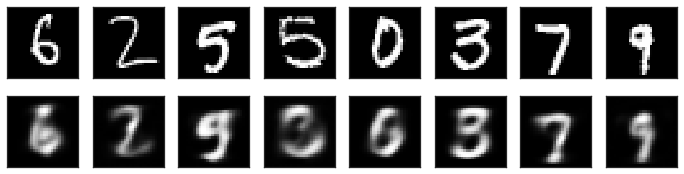

In [36]:
fig, fig_ax = plt.subplots(nrows=2, ncols=8, figsize=(12,3))
for i in range(8):
    random_image = mnist.test.images[np.random.randint(0, 10000, 1), :]
    plt.subplot(2,8,i+1)
    plt.imshow(random_image.reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    
    plt.subplot(2,8,i+9)
    plt.imshow(autoencoder.predict(random_image).reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

## Convolutional autoencoder

In [37]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [82]:
input = Input(shape=(784,))
x = Reshape((28, 28, 1))(input)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(x)
encoded = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(16, (3, 3), padding='same', activation='relu')(encoded)
x = UpSampling2D(size=(2,2))(x)
x = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)
decoded = Reshape((784,))(x)

autoencoder = Model(input, decoded)

In [83]:
encoder = Model(input, encoded)

In [84]:
## the decoder mapping from a (14, 14, 16) to (28, 28, 1) doesn't make a lot of sense
decoder_input = Input(shape=(14, 14, 16))
x = autoencoder.layers[-3](decoder_input)
x = autoencoder.layers[-2](x)
decoder_output = autoencoder.layers[-1](x)
decoder = Model(decoder_input, decoder_output)

In [85]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

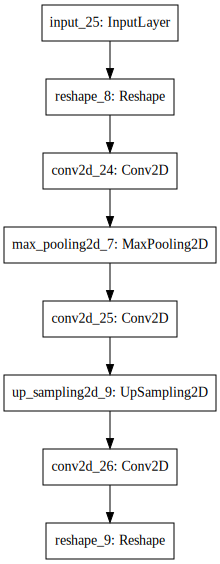

In [88]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

In [86]:
history = autoencoder.fit(mnist.train.images, mnist.train.images, batch_size=128, nb_epoch=10,
                          validation_data=[mnist.test.images, mnist.test.images])

/Users/zzeng/Documents/Python/env/ml_env/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 39s - loss: 0.1302 - val_loss: 0.0727
Epoch 2/10
55000/55000 [==============================] - 41s - loss: 0.0701 - val_loss: 0.0678
Epoch 3/10
55000/55000 [==============================] - 43s - loss: 0.0676 - val_loss: 0.0662
Epoch 4/10
55000/55000 [==============================] - 45s - loss: 0.0666 - val_loss: 0.0658
Epoch 5/10
55000/55000 [==============================] - 42s - loss: 0.0659 - val_loss: 0.0652
Epoch 6/10
 1152/55000 [..............................] - ETA: 37s - loss: 0.0652

KeyboardInterrupt: 

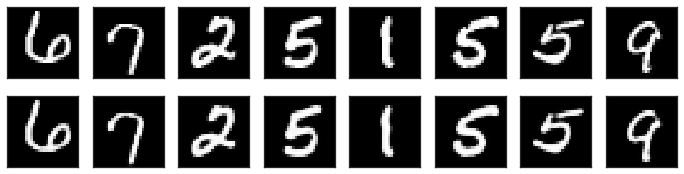

In [87]:
fig, fig_ax = plt.subplots(nrows=2, ncols=8, figsize=(12,3))
for i in range(8):
    random_image = mnist.test.images[np.random.randint(0, 10000, 1), :]
    plt.subplot(2,8,i+1)
    plt.imshow(random_image.reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    
    plt.subplot(2,8,i+9)
    plt.imshow(autoencoder.predict(random_image).reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

## Sequence-to-sequence autoencoder

In [93]:
timesteps = 10
input_dim = 500
hidden_dim = 25

In [97]:
input = Input(shape=(timesteps, input_dim))
encoded = LSTM(hidden_dim)(input)
x = RepeatVector(timesteps)(encoded)
decoded = LSTM(input_dim, return_sequences=True)(x)

autoencoder = Model(input, decoded)

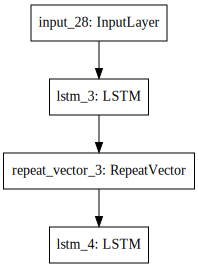

In [98]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(autoencoder).create(prog='dot', format='svg'))

## variational autoencoder (VAE)

In [80]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [81]:
input_dim = 784
intermediate_dim = 200
encoding_dim = 100

In [82]:
def sample_Z(args):
    z_mean, z_log_sigma = args
    epsilon = tf.random_normal(tf.shape(z_mean), mean=0, stddev=1)
    return z_mean + tf.exp(z_log_sigma) * epsilon

In [83]:
x = Input(shape=(input_dim,))
encoder_h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(encoding_dim)(encoder_h)
z_log_sigma = Dense(encoding_dim)(encoder_h)

z = Lambda(sample_Z, output_shape=(encoding_dim,))([z_mean, z_log_sigma])
decoder_h = Dense(intermediate_dim, activation='relu')(z)
decoder_x_mean = Dense(input_dim, activation='sigmoid')(decoder_h)

In [84]:
def vae_loss(x, decoder_x_mean):
    cross_entropy_loss = losses.binary_crossentropy(x, decoder_x_mean)
    kl_div_loss = - 0.5 * tf.reduce_mean(1 + z_log_sigma - tf.square(z_mean) - tf.exp(z_log_sigma), axis=-1)
    return cross_entropy_loss + kl_div_loss

In [85]:
vae = Model(x, decoder_x_mean)

encoder = Model(x, z_mean)

_decoder_input = Input(shape=(encoding_dim,))
_decoder_h = vae.layers[-2](_decoder_input)
_decoder_x_mean = vae.layers[-1](_decoder_h)

decoder = Model(_decoder_input, _decoder_x_mean)

In [86]:
vae.compile(optimizer='rmsprop', loss=vae_loss)

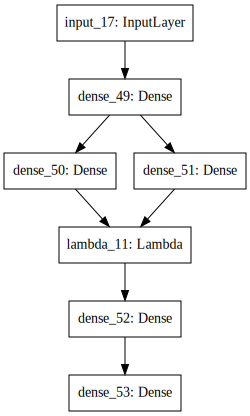

In [87]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(vae).create(prog='dot', format='svg'))

In [88]:
history = vae.fit(mnist.train.images, mnist.train.images, batch_size=128, epochs=10,
                  validation_data=(mnist.test.images, mnist.test.images))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 5s - loss: 0.2743 - val_loss: 0.2567
Epoch 2/10
55000/55000 [==============================] - 4s - loss: 0.2523 - val_loss: 0.2450
Epoch 3/10
55000/55000 [==============================] - 4s - loss: 0.2393 - val_loss: 0.2318
Epoch 4/10
55000/55000 [==============================] - 4s - loss: 0.2269 - val_loss: 0.2199
Epoch 5/10
55000/55000 [==============================] - 5s - loss: 0.2165 - val_loss: 0.2134
Epoch 6/10
55000/55000 [==============================] - 5s - loss: 0.2118 - val_loss: 0.2097
Epoch 7/10
55000/55000 [==============================] - 5s - loss: 0.2091 - val_loss: 0.2072
Epoch 8/10
55000/55000 [==============================] - 5s - loss: 0.2074 - val_loss: 0.2056
Epoch 9/10
55000/55000 [==============================] - 5s - loss: 0.2058 - val_loss: 0.2040
Epoch 10/10
55000/55000 [==============================] - 5s - loss: 0.2046 - val_loss: 0.2030

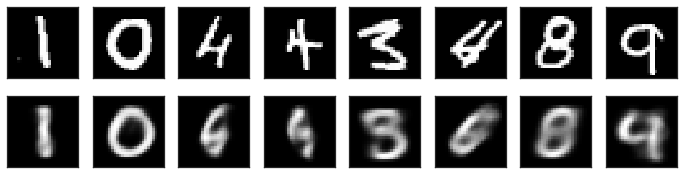

In [89]:
fig, fig_ax = plt.subplots(nrows=2, ncols=8, figsize=(12,3))
for i in range(8):
    random_image = mnist.test.images[np.random.randint(0, 10000, 1), :]
    plt.subplot(2,8,i+1)
    plt.imshow(random_image.reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    
    plt.subplot(2,8,i+9)
    plt.imshow(vae.predict(random_image).reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

[]

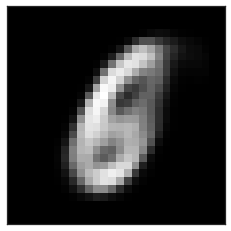

In [90]:
z_sample = np.random.normal(size=(1, encoding_dim))
plt.imshow(decoder.predict(z_sample).reshape((28,28)), cmap='gray')
plt.gca().set_xticks([])
plt.gca().set_yticks([])

[]

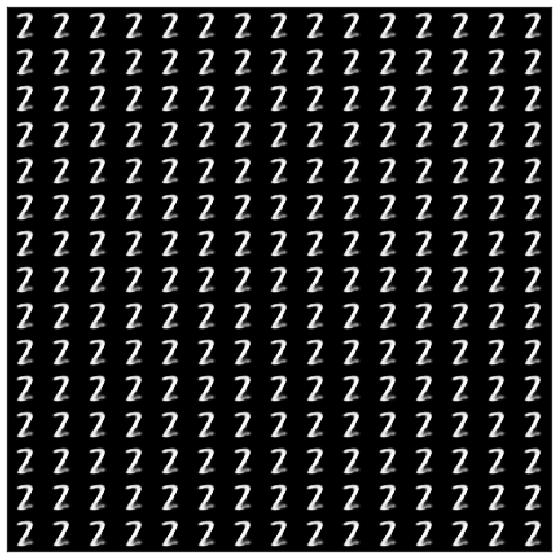

In [100]:
# this code works well when the encodimg dim = 2

n = 15
digit_size = 28
grid_x = scipy.stats.norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = scipy.stats.norm.ppf(np.linspace(0.05, 0.95, n))

figure = np.zeros((digit_size * n, digit_size * n))
for i, yi in enumerate(grid_y):
    for j, xj in enumerate(grid_x):
#         z_sample = np.array([[xj, yi]])
        z_sample = np.concatenate([np.repeat(grid_x[1], encoding_dim/2), np.repeat(grid_x[-1], encoding_dim/2)])
        z_sample = np.expand_dims(z_sample, 0)
        x_decoded = decoder.predict(z_sample)[0]
        digit = x_decoded.reshape(digit_size, digit_size)
        figure[i*digit_size : (i+1)*digit_size,
               j*digit_size : (j+1)*digit_size] = digit
        
plt.figure(figsize=(10,10))
plt.imshow(figure, cmap='gray')
plt.gca().set_xticks([])
plt.gca().set_yticks([])

## conditional VAE

In [113]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [114]:
input_dim = 784
intermediate_dim = 200
encoding_dim = 100
y_dim = 10

In [115]:
def sample_Z(args):
    z_mean, z_log_sigma = args
    epsilon = tf.random_normal(tf.shape(z_mean), mean=0, stddev=1)
    return z_mean + tf.exp(z_log_sigma) * epsilon

In [116]:
x = Input(shape=(input_dim,))
y = Input(shape=(y_dim,))
encoder_merged = concatenate([x,y])
encoder_h = Dense(intermediate_dim, activation='relu')(encoder_merged)
z_mean = Dense(encoding_dim)(encoder_h)
z_log_sigma = Dense(encoding_dim)(encoder_h)

z = Lambda(sample_Z, output_shape=(encoding_dim,))([z_mean, z_log_sigma])
decoder_merged = concatenate([z,y])
decoder_h = Dense(intermediate_dim, activation='relu')(decoder_merged)
decoder_x_mean = Dense(input_dim, activation='sigmoid')(decoder_h)

In [117]:
def vae_loss(x, decoder_x_mean):
    cross_entropy_loss = losses.binary_crossentropy(x, decoder_x_mean)
    kl_div_loss = - 0.5 * tf.reduce_mean(1 + z_log_sigma - tf.square(z_mean) - tf.exp(z_log_sigma), axis=-1)
    return cross_entropy_loss + kl_div_loss

In [119]:
vae = Model([x,y], decoder_x_mean)

encoder = Model([x,y], z_mean)

_decoder_input = Input(shape=(encoding_dim,))
_decoder_merged = concatenate([_decoder_input, y])
_decoder_h = vae.layers[-2](_decoder_merged)
_decoder_x_mean = vae.layers[-1](_decoder_h)

decoder = Model([_decoder_input,y], _decoder_x_mean)

In [122]:
vae.compile(optimizer='rmsprop', loss=vae_loss)

In [123]:
history = vae.fit([mnist.train.images, mnist.train.labels], mnist.train.images, batch_size=128, epochs=10,
                  validation_data=([mnist.test.images, mnist.test.labels], mnist.test.images))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 5s - loss: 0.2627 - val_loss: 0.2284
Epoch 2/10
55000/55000 [==============================] - 5s - loss: 0.2213 - val_loss: 0.2171
Epoch 3/10
55000/55000 [==============================] - 5s - loss: 0.2144 - val_loss: 0.2084
Epoch 4/10
55000/55000 [==============================] - 5s - loss: 0.2044 - val_loss: 0.1999
Epoch 5/10
55000/55000 [==============================] - 5s - loss: 0.1981 - val_loss: 0.1950
Epoch 6/10
55000/55000 [==============================] - 5s - loss: 0.1947 - val_loss: 0.1929
Epoch 7/10
55000/55000 [==============================] - 5s - loss: 0.1926 - val_loss: 0.1913
Epoch 8/10
55000/55000 [==============================] - 5s - loss: 0.1910 - val_loss: 0.1901
Epoch 9/10
55000/55000 [==============================] - 6s - loss: 0.1899 - val_loss: 0.1891
Epoch 10/10
55000/55000 [==============================] - 6s - loss: 0.1889 - val_loss: 0.1879

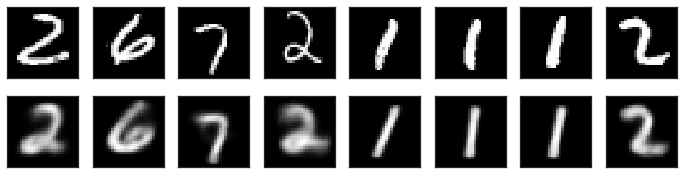

In [129]:
fig, fig_ax = plt.subplots(nrows=2, ncols=8, figsize=(12,3))
for i in range(8):
    random_number = np.random.randint(0, 10000, 1)
    image, label = mnist.test.images[random_number, :], mnist.test.labels[random_number, :]
    plt.subplot(2,8,i+1)
    plt.imshow(image.reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    
    plt.subplot(2,8,i+9)
    plt.imshow(vae.predict([image, label]).reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

7


[]

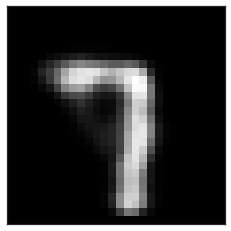

In [134]:
z_sample = np.random.normal(size=(1, encoding_dim))

n_samples = 1
y_sample = np.zeros(shape=[n_samples, y_dim])
for k in range(n_samples):
    digit = np.random.randint(0, y_dim)
    print digit
    y_sample[k, digit] = 1

plt.imshow(decoder.predict([z_sample, y_sample]).reshape((28,28)), cmap='gray')
plt.gca().set_xticks([])
plt.gca().set_yticks([])

## convolutional VAE

In [66]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [67]:
input_dim = 784
intermediate_dim = 2
encoding_dim = 100
num_filters = 100

In [68]:
def sample_Z(args):
    z_mean, z_log_sigma = args
    epsilon = tf.random_normal(tf.shape(z_mean), mean=0, stddev=1)
    return z_mean + tf.exp(z_log_sigma) * epsilon

In [69]:
x = Input(shape=(input_dim,))
encoder_h = Reshape((28,28,1))(x)
encoder_h = Conv2D(num_filters, (3,3), padding='same', activation='relu')(encoder_h)
encoder_h = MaxPooling2D((2,2))(encoder_h)
encoder_h = Flatten()(encoder_h)
encoder_h = Dense(intermediate_dim, activation='relu')(encoder_h)

z_mean = Dense(encoding_dim)(encoder_h)
z_log_sigma = Dense(encoding_dim)(encoder_h)
z = Lambda(sample_Z, output_shape=(encoding_dim,))([z_mean, z_log_sigma])

decoder_h = Dense(intermediate_dim, activation='relu')(z)
decoder_h = Dense(14*14*num_filters, activation='relu')(decoder_h)
decoder_h = Reshape((14, 14, num_filters))(decoder_h)
decoder_h = Conv2D(num_filters, (3,3), padding='same', activation='relu')(decoder_h)
decoder_h = UpSampling2D((2,2))(decoder_h)
decoder_h = Conv2D(1, (3,3), padding='same', activation='sigmoid')(decoder_h)
decoder_x_mean = Reshape((784,))(decoder_h)

vae = Model(x, decoder_x_mean)

In [70]:
def vae_loss(x, decoder_x_mean):
    cross_entropy_loss = losses.binary_crossentropy(x, decoder_x_mean)
    kl_div_loss = - 0.5 * tf.reduce_mean(1 + z_log_sigma - tf.square(z_mean) - tf.exp(z_log_sigma), axis=-1)
    return cross_entropy_loss + kl_div_loss

In [71]:
encoder = Model(x, z_mean)

_decoder_input = Input(shape=(encoding_dim,))
_decoder_h = None
for i in range(-7, 0):
    if _decoder_h is None:
        _decoder_h = vae.layers[i](_decoder_input)
    else:
        _decoder_h = vae.layers[i](_decoder_h)
_decoder_x_mean = vae.layers[-1](_decoder_h)

decoder = Model(_decoder_input, _decoder_x_mean)

In [72]:
vae.compile(optimizer='rmsprop', loss=vae_loss)

In [73]:
history = vae.fit(mnist.train.images, mnist.train.images, batch_size=128, epochs=10,
                  validation_data=(mnist.test.images, mnist.test.images))

Train on 55000 samples, validate on 10000 samples
Epoch 1/10
55000/55000 [==============================] - 16s - loss: 0.3639 - val_loss: 0.2691
Epoch 2/10
55000/55000 [==============================] - 16s - loss: 0.2663 - val_loss: 0.2647
Epoch 3/10
55000/55000 [==============================] - 18s - loss: 0.2645 - val_loss: 0.2641
Epoch 4/10
55000/55000 [==============================] - 18s - loss: 0.2641 - val_loss: 0.2638
Epoch 5/10
55000/55000 [==============================] - 18s - loss: 0.2640 - val_loss: 0.2638
Epoch 6/10
55000/55000 [==============================] - 18s - loss: 0.2639 - val_loss: 0.2636
Epoch 7/10
55000/55000 [==============================] - 18s - loss: 0.2638 - val_loss: 0.2636
Epoch 8/10
55000/55000 [==============================] - 17s - loss: 0.2638 - val_loss: 0.2636
Epoch 9/10
55000/55000 [==============================] - 17s - loss: 0.2638 - val_loss: 0.2635
Epoch 10/10
55000/55000 [==============================] - 18s - loss: 0.2638 - val_lo

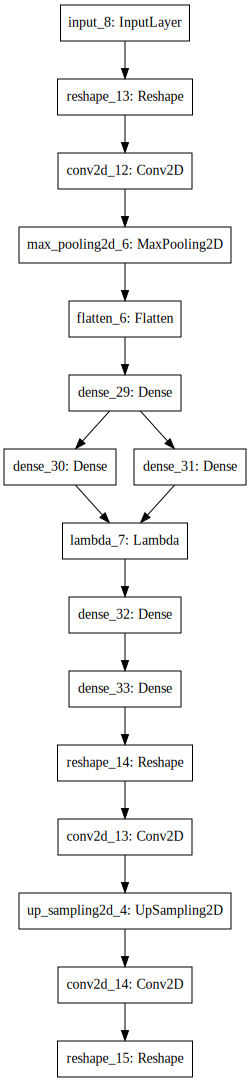

In [26]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(vae).create(prog='dot', format='svg'))

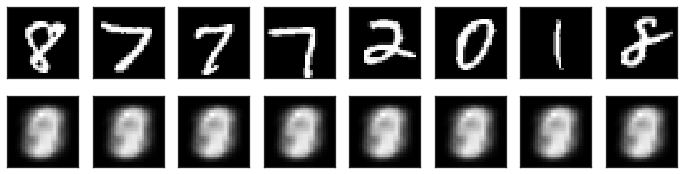

In [74]:
fig, fig_ax = plt.subplots(nrows=2, ncols=8, figsize=(12,3))
for i in range(8):
    random_image = mnist.test.images[np.random.randint(0, 10000, 1), :]
    plt.subplot(2,8,i+1)
    plt.imshow(random_image.reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    
    plt.subplot(2,8,i+9)
    plt.imshow(vae.predict(random_image).reshape((28,28)), cmap='gray')
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])

[]

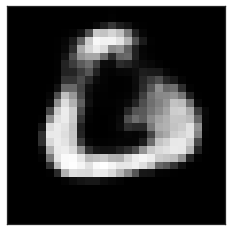

In [38]:
z_sample = np.random.normal(size=(1, encoding_dim))
plt.imshow(decoder.predict(z_sample).reshape((28,28)), cmap='gray')
plt.gca().set_xticks([])
plt.gca().set_yticks([])

In [40]:
n = 15
digit_size = 28
grid_x = scipy.stats.norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = scipy.stats.norm.ppf(np.linspace(0.05, 0.95, n))

In [ ]:
figure = np.zeros((digit_size * n, digit_size * n))
for i, yi in enumerate(grid_y):
    for j, xj in enumerate(grid_x):
#         z_sample = np.array([[xj, yi]])
        z_sample = np.concatenate([np.repeat(grid_x[1], encoding_dim/2), np.repeat(grid_x[-1], encoding_dim/2)])
        x_decoded = decoder.predict(z_sample)[0]
        digit = x_decoded.reshape(digit_size, digit_size)
        figure[i*digit_size : (i+1)*digit_size,
               j*digit_size : (j+1)*digit_size] = digit